# <center>K-近邻算法</center>

## 原理  
属于监督学习的一种。  
输入为一些一些已经类别的样本数据，对于未知类别的数据，与样本中的数据一一进行比较，选取k个最小距离（距离是根据样本数据的属性差值来计算）的数据。然后在k个数据中找出次数出现最多的分类，作为新数据的分类。
### 优点
算法简单，容易理解。在样本的特征数据结构不复杂的情况下，精度比较高。
### 缺点
由于每一个未知的数据都需要和样本中的每个数据进行比较，因此算法的执行效率低下，且空间成本高。  
同时，对于输入数据是多维数组的情况，要求样本数据和待测试的数据差异不是很大。例如对于数字识别，如果测试的数据是样本数据的偏移，或者是缩小版本，那么测试结果将不准备。由于计算距离时，是对比每个像素的差值，因此如果图像出现偏移，那么将导致计算的结果不准确（仅仅猜测）。

## KNN分类函数的编写  
分类函数的输入参数为4个，分别为
- 测试的数据（单行数据）
- 样本数据的集合(ndarray数据类型)
- 样本数据的标签
- 以及选择的K值  

程序的返回值为
- 测试数据的分类结果  

In [1]:
#定义分类函数，
import operator


def classify0(inX, dataSet, labels, k):
    # 获得数据样本的行数
    dataSetSize = dataSet.shape[0]
    # 将单行的测试数据生成一个和样本集一样大小的矩阵，同时和样本数据集做减法，得到差值。
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 计算差值的平方，得到的是差值的矩阵
    sqDiffMat = diffMat**2
    # 对差值的平方进行求和，sum为ndarray的方法，没有axis参数时表示全部相加，axis=0时表示按列相加，axis=1时表示按行相加
    sqDistances = sqDiffMat.sum(axis=1)
    # 求根运算，返回的是待测试数据和样本中每个数据的距离
    distances = sqDistances**0.5
    # 对数据进行升序排序，返回的是数据的index
    sortedDistindicies = distances.argsort()
    # [] () {}的区别，[]表示列表,()表示元组，{}表示字典
    classCount = {}
    # 对前k个最小距离的标签进行统计
    for i in range(k):
        # 获得第i个最小距离样本的标签
        voteLabel = labels[sortedDistindicies[i]]
        # 将标签加入到字典中，如果字典中不存在，则设置初始值为1，否则数量加1.
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    #注意字典的属性，课本上的iteritems已经不在适用
    #sorted 函数的参数，可迭代的对象，比较函数，可用来比较的元素，排序规则，下述代码中没有提供比较函数
    #dict.items() Returns a list of dict's (key, value) tuple pairs
    #operator.itemgetter(1)返回的是对象第一个域的数值的函数
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

### 测试程序-分类函数  
假设存在两个分类A和B，每个分类涵盖两个数据样本。输入新的数据点，查看代码的输出，测试程序如下：  

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#创建测试数据的集合。
def createDataSet():
    # 创建涵盖4个点的数组
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    # 这四个点对应的标签分别为A,A,B,B
    labels = ['A', 'A', 'B', 'B']
    return group, labels

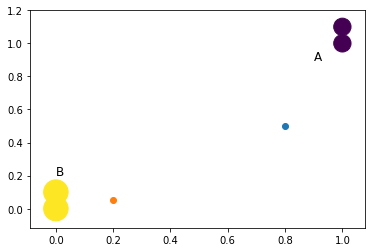

the predict classify of  [0.8 0.5] is : A
the predict classify of  [0.2  0.05] is : B


In [3]:
#功能测试
group, labels = createDataSet()
fig, ax = plt.subplots()
ax.scatter(group[:, 0], group[:, 1], 300 * np.array([1, 1, 2, 2]),
           300 * np.array([1, 1, 2, 2]))

# 在这里分别测试两组数据
testData = np.array([[0.8, 0.5], [0.2, .05]])

ax.scatter(testData[0, 0], testData[0, 1])
ax.scatter(testData[1, 0], testData[1, 1])

ax.text(0.9, 0.9, 'A', fontsize=12)
ax.text(0, 0.2, 'B', fontsize=12)

plt.show()
print('the predict classify of ', testData[0], 'is :',
      classify0(testData[0], group, labels, 3))

print('the predict classify of ', testData[1], 'is :',
      classify0(testData[1], group, labels, 3))

### 从文件中读取样本数据程序
### Parsing data from a text File

In [4]:
''' 
This function takes a filename and output two things:  
a matrix of trainning examples and a vector of class label
'''


def file2matrix(filename):
    with open(filename) as fr:
        arrayLines = fr.readlines()
        numberOfLines = len(arrayLines)  # get how many lines in the file
        returnMat = np.zeros(
            (numberOfLines, 3))  #h create a zeros matrix contains the features
        classLabelVector = []  # create a list contains the labels
        for index, line in enumerate(arrayLines):
            listFromLine = line.strip().split('\t')
            returnMat[index, :] = listFromLine[0:3]
            classLabelVector.append(int(listFromLine[-1]))
    return returnMat, classLabelVector

### Functionality test for `file2matrix`

In [5]:
datingDataMat, datingLabels = file2matrix('./datingTestSet2.txt')
print(datingDataMat[0:3])

[[4.092000e+04 8.326976e+00 9.539520e-01]
 [1.448800e+04 7.153469e+00 1.673904e+00]
 [2.605200e+04 1.441871e+00 8.051240e-01]]


In [6]:
print(datingLabels[0:3])

[3, 2, 1]


### Analyze: creating scatter plots with Matplotlib

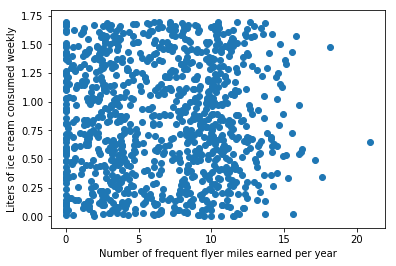

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
plt.xlabel('Number of frequent flyer miles earned per year')
plt.ylabel('Liters of ice cream consumed weekly')
plt.show()

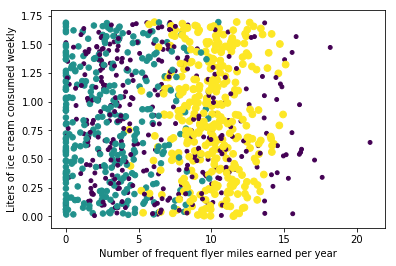

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2],
           15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
plt.xlabel('Number of frequent flyer miles earned per year')
plt.ylabel('Liters of ice cream consumed weekly')
plt.show()

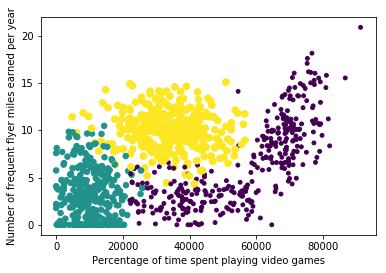

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1],
           15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
labels = ['x', 'y', 'z']
plt.xlabel('Percentage of time spent playing video games')
plt.ylabel('Number of frequent flyer miles earned per year')
plt.show()

`setting for supporting to visulize Chinese characters`
``` python
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
```

### Prepare: normalizing numeric values

In [10]:
#Data-normalizing code
def autoNorm(dataSet):
    minVals = dataSet.min(
        0)  # 0 means axis=0, get the minimum values of each columns
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]  # get how many lines in the dataSet
    #newValue = (oldValue-min)/(max-min)
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

#### try out `autoNorm`

In [11]:
normMat, ranges, minVals = autoNorm(datingDataMat)
print(normMat[0:3])

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]]


In [12]:
print(ranges[0:3])

[9.1273000e+04 2.0919349e+01 1.6943610e+00]


In [13]:
print(minVals[0:3])

[0.       0.       0.001156]


### Test: testing the classifier as a whole program

In [14]:
def datingClassTest():
    hoRatio = 0.1 #10% data are used for verifying
    datingDataMat, datingLabels = file2matrix('./datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],\
                                    datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is : %d" %
              (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print(
        "the total error rate is : %0.2f" % (errorCount / float(numTestVecs)))


datingClassTest()

the classifier came back with: 3, the real answer is : 3
the classifier came back with: 2, the real answer is : 2
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 2, the real answer is : 2
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 

### Use: putting together a useful system

In [15]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters  of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normMat,
                                 datingLabels, 3)
    print("you will probably like this person:",
          resultList[classifierResult - 1])

In [16]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10
liters  of ice cream consumed per year?10
you will probably like this person: in small doses


## Example: a handwriting recognition system
### Prepare: converting images into test vectors

In [17]:
# convert the image to a vector
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [18]:
# functionality test
testVector = img2vector('./testDigits/0_13.txt')
testVector[0:31]

array([[0., 0., 0., ..., 0., 0., 0.]])

### Test: kNN on handwritten digits

In [19]:
import os


def handwritingClassTest():
    hwLabels = []  # store digit for each line
    trainingFileList = os.listdir(
        './trainingDigits')  #extract files for training
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))  # create training matrix

    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(
            fileStr.split('_')[0])  # parse the digit from file name
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('./trainingDigits/%s' % fileNameStr)

    testFileList = os.listdir('./testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with : %d, the real answer is %d" %
              (classifierResult, classNumStr))
        if classifierResult != classNumStr: errorCount += 1.

    print("\nthe total number of errors is :%d" % errorCount)
    print("\nthe total error rate is : %f" % (errorCount / float(mTest)))

In [20]:
handwritingClassTest()

the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answer is 0
the classifier came back with : 0, the real answ

the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answer is 1
the classifier came back with : 1, the real answ

the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answer is 3
the classifier came back with : 3, the real answ

the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answer is 4
the classifier came back with : 4, the real answ

the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answer is 6
the classifier came back with : 6, the real answ

the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answer is 7
the classifier came back with : 7, the real answ

the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answer is 9
the classifier came back with : 9, the real answ